In [17]:
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

FOCUS_GENES = ('SCN1A','SCN2A','KCNQ2', 'KCNQ3', 'CDKL5',
               'PCDH19', 'SCN1B', 'SCN8A', 'SLC2A1',
               'SPTAN1', 'STXBP1', 'TSC1')

def mk_class(row):
    if row['Classification'] in ('Benign', 'BENIGN', 'LIKELY BENIGN', 'likely benign', 'benign'):
        return 'B'
    elif row['Classification'] in ('pathogenic recessive', 'pathogenic dominant', 'likely pathogenic',
                                   'PATHOGENIC', 'LIKELY PATHOGENIC', 'Reduced function allele', 'pathogenic'):
        return 'P'
    elif str(row['Classification']) in ('VUS', 'nan'):
        return 'V'
    else:
        print(str(row['Classification']))
        i = 1/0
        
afile = '../data/raw/EpilepsyVariantDataForAhmadClean_090517.xlsx'
df = pd.read_excel(afile)
df.loc[:, 'class'] = df.apply(mk_class, axis=1)
focus = df[ df.apply(lambda row: str(row['Gene Symbol']) in FOCUS_GENES and row['class'] != 'V', axis=1) ]
ss = focus.groupby(['Gene Symbol', 'class']).size().reset_index().rename(columns={0:'size'})

In [18]:
ss.head()

,Gene Symbol,class,size
0,SCN1A,B,19
1,SCN1A,P,94


(array([0]), <a list of 1 Text xticklabel objects>)

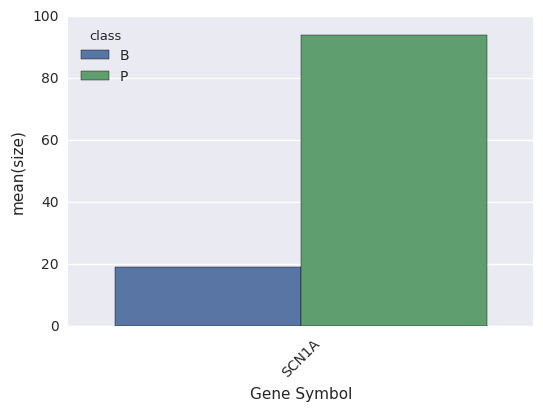

In [19]:
sns.barplot(x='Gene Symbol', y='size', hue='class', data=ss)
plt.xticks(rotation=45)